# Visualizing filters in Pytorch

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision
import torch
import numpy as np
from util import utils

## Loading the Image

Image shape: (224, 224)


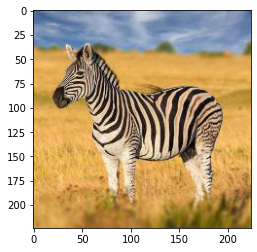

In [2]:
image = Image.open(utils.image_input_dir.joinpath("zebra.jpg"))
plt.imshow(image)
print(f"Image shape: {image.size}")

## Loading the PreTrained Model
In this example we will use a pre-trained ResNet50 network.
ResNet-50 is a fully-convolutional neural network that excels at image classification.

In [3]:
model = torchvision.models.resnet50(pretrained=True)

## First convolution layer
In this task we are interested in visualizing the first convolutional layer. This can be retrieved by the following code block: 

Observe that it has 64 filters/kernels in the layer. Each kernel is a $7 \times 7$ filter, that takes an RGB image as input

In [4]:
first_conv_layer = model.conv1
print("First conv layer:", first_conv_layer)

First conv layer: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)


## Activation from first layer
We need to resize, and normalize the image with the mean and standard deviation that they used to originally train this network.

In [5]:
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

### Apply the image transform to the zebra image

By running the image through the first layer, we get an activation.
We can retrieve the activation from the first layer by doing a forward pass throught this conv layer.

Also, we can retrieve the weight from the first convolution layer with the following:

In [6]:
image = image_transform(image)[None]
activation = first_conv_layer(image)
weight = model.conv1.weight.data.cpu()

print(f"""
     Image: {image.shape}
Activation: {activation.shape}
    Weight: {weight.shape}
""")


     Image: torch.Size([1, 3, 224, 224])
Activation: torch.Size([1, 64, 112, 112])
    Weight: torch.Size([64, 3, 7, 7])



## Visualize filters & Activation
We've created a function `torch_image_to_numpy` to help you out.
This function transforms an torch tensor with shape 

(batch size, num channels, height, width) to

(batch size, height, width, num channels) numpy array

In [7]:
def torch_image_to_numpy(image: torch.Tensor):
    # Normalize to [0 - 1.0]
    image = image.detach().cpu() # Transform image to CPU memory (if on GPU VRAM)
    image = image - image.min()
    image = image / image.max()
    image = image.numpy()
    if len(image.shape) == 2: # Grayscale image, can just return
        return image
    assert image.shape[0] == 3, f"Expected color channel to be on first axis. Got: {image.shape}"
    image = np.moveaxis(image, 0, 2)
    return image

# Task 2c
Run the image zebra.jpg through the first layer of the ResNet50 network. Visualize the filter, and the grayscale activation of a the filter, by plotting them side by side. Use the pre-trained network ResNet50 and visualize the convolution filters with indices [5, 8, 19, 22, 34].

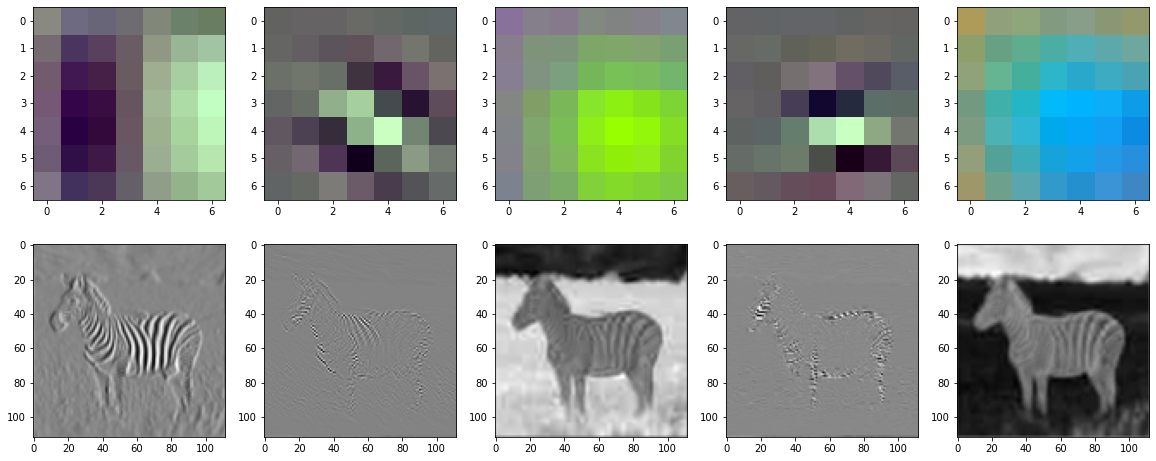

In [8]:
indices = [5, 8, 19, 22, 34]
num_filters = len(indices)
fig_size = 4
fig_rows = 2

plt.figure(figsize=(fig_size * num_filters, fig_size * fig_rows)) 
n = 1
for i in indices:
    plt.subplot(fig_rows, num_filters, n)
    # Plot weight here
    plt.imshow(torch_image_to_numpy(weight[i]))
    
    plt.subplot(fig_rows, num_filters, n + num_filters)
    # Plot activation here
    plt.imshow(torch_image_to_numpy(activation[0][i]), cmap='gray')
    n += 1

plt.savefig(utils.image_output_dir.joinpath("task2c.png"), transparent=True)